### 逻辑回归的本质

在特征平面中找到一条直线，来分割所有样本对应的分类。这就是逻辑回归只能解决二分类问题的原因。
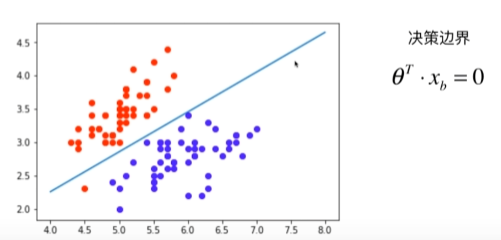

### 多项式逻辑回归

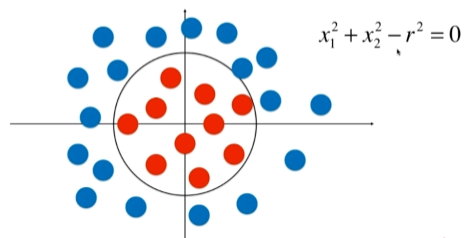
可以将高次式项看成一个特征。那么对于x1和x2，该决策边界就是非线性的。对于x1\^2和x2\^2，决策边界就是线性的。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 数据准备
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:,0]**2+X[:,1]**2)<1.5, dtype='int')

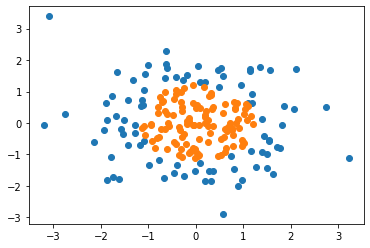

In [3]:
plt.scatter(X[y==0,0], X[y==0,1]) # 类别0
plt.scatter(X[y==1,0], X[y==1,1]) # 类别1
plt.show()

### 使用逻辑回归

In [4]:
from playML.LogisticRegression import LogisticRegression

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [6]:
log_reg.score(X, y) # 分类准确度很差

0.605

In [7]:
# 绘制模型的决策分界
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

<ipython-input-7-b9d1d97f74f0>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


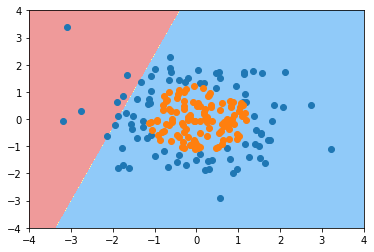

In [8]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show() # 可以看出逻辑回归不能很好的解决

### 使用多项式回归

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 多项式逻辑回归
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree = degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [10]:
poly_log_reg = PolynomialLogisticRegression(degree = 2)
poly_log_reg.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [11]:
poly_log_reg.score(X, y)  # 分类准确度得到了提高

0.95

<ipython-input-7-b9d1d97f74f0>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


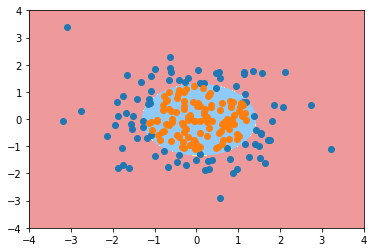

In [12]:
# 绘制出决策边界
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [13]:
# 提高degree
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

<ipython-input-7-b9d1d97f74f0>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


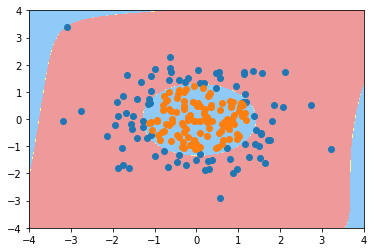

In [14]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()  # degree提高，可以发现决策边界变得很不规则，表示出现了过拟合的现象